In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

### Convert some variables from numerical to categorical or vise versa
### Fill in null values appropriately 
### Feature engineering 

In [226]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Natal\AppData\Local\Temp\ipykernel_22184\2525002550.py:5: UserWarning:

The figure layout has changed to tight



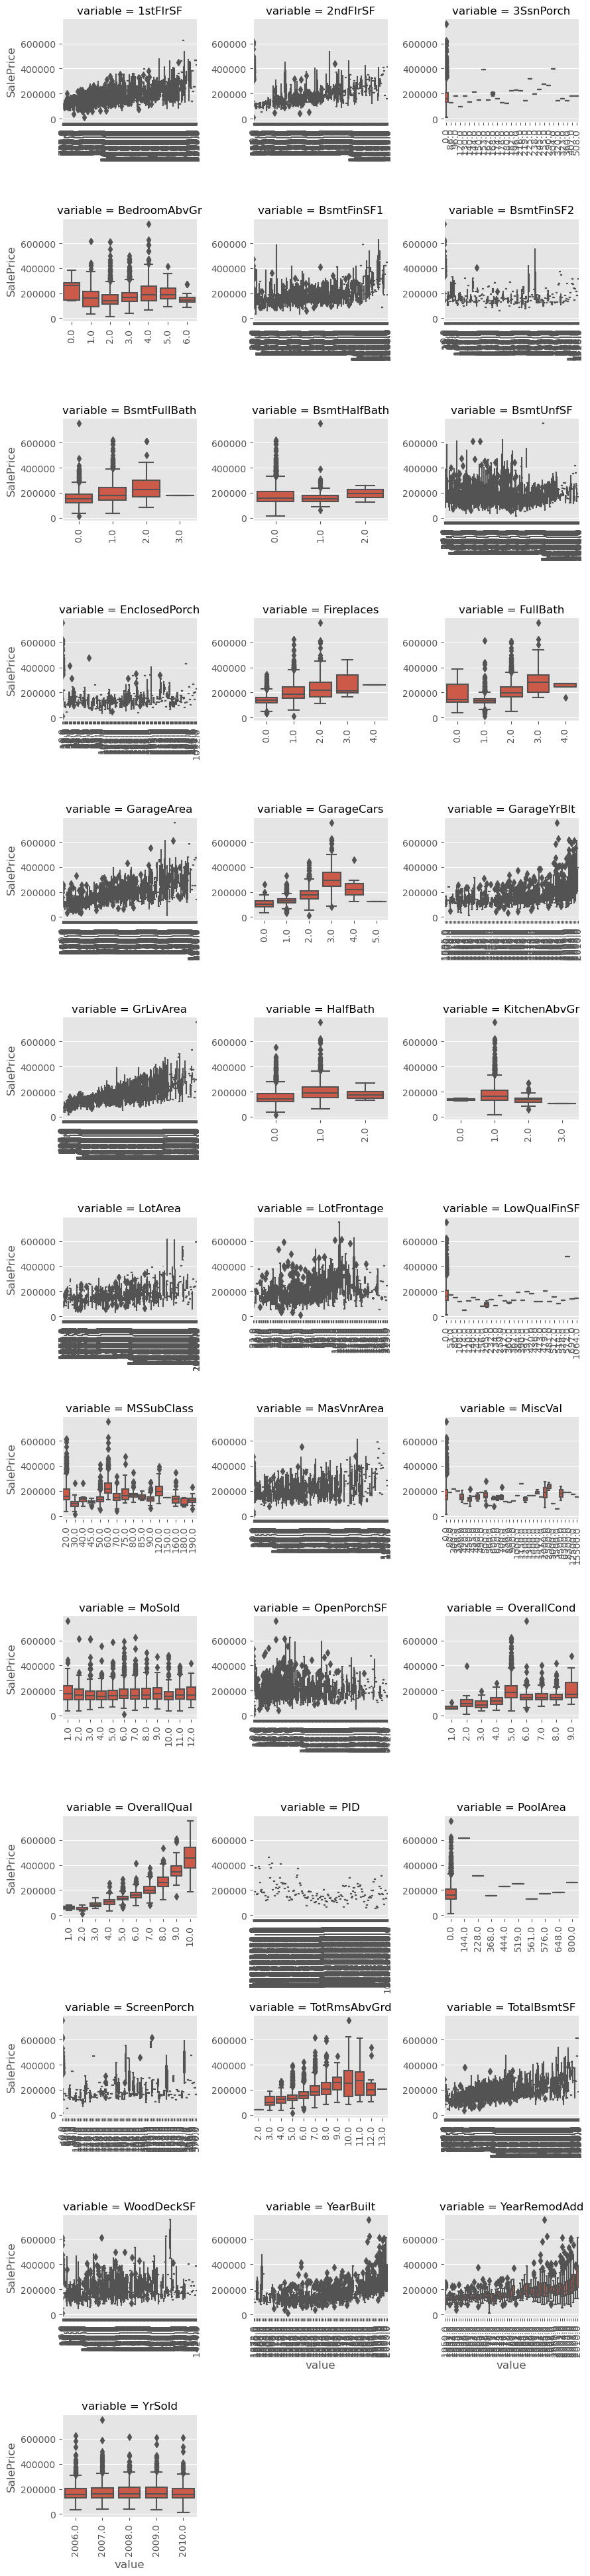

In [230]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(numerical_columns))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Natal\AppData\Local\Temp\ipykernel_22184\4238931142.py:5: UserWarning:

The figure layout has changed to tight



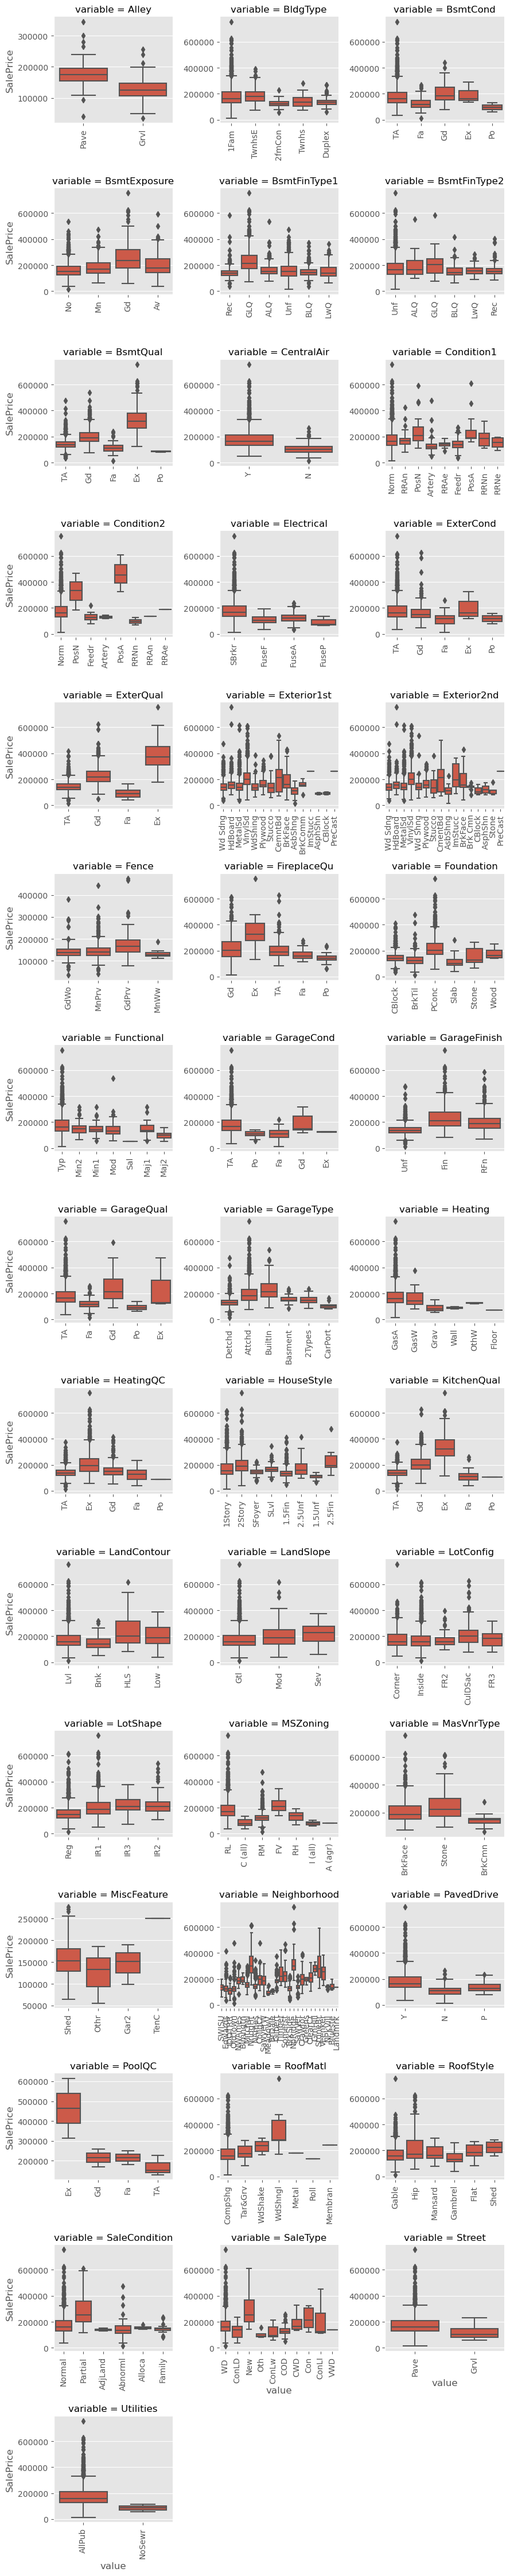

In [229]:
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(categorical_columns))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [225]:
fig = px.scatter(housing, x= 'GrLivArea', y = 'SalePrice', color = 'OverallQual')
fig.show()

In [222]:
housing.loc[housing.GrLivArea > 4000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
309,908154205,4676,184750,60,RL,130.0,40094,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,10,2007,New,Partial
1007,528351010,4316,755000,60,RL,104.0,21535,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal


In [153]:
fig = px.box(housing, x='OverallQual', y='SalePrice', points="all",
             title='Overall Quality vs. Sale Price',
             labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Pricem($)'})

fig.show()

In [84]:
fig = px.box(housing, x='ExterQual', y='SalePrice', points="all",
             title='Sale Price by External Quality',
             labels={'ExterQual': 'External Quality', 'SalePrice': 'Sale Price ($)'})

fig.show()

In [80]:
fig = px.box(housing, x='KitchenQual', y='SalePrice', points="all",
             title='Kitchen Quality vs. Sale Price',
             labels={'ExterQual': 'External Quality', 'SalePrice': 'Sale Price ($)'})

fig.show()

In [86]:
fig = px.scatter(
    x=housing.Neighborhood, 
    y= housing.SalePrice, 
    #color = df_normal_quality.SalePrice,
    color = housing.OverallQual,
    labels={'x': 'Neighborhood', 
            'y': 'Sale Price ($)',
           'color': 'Overall Quality'},
    title='Neighborhood vs SalePrice'
)

# Show the plot
fig.show()

In [72]:
print('no garage', housing.loc[housing.GarageYrBlt.isnull()].SalePrice.mean())
print('garage', housing.loc[housing.GarageYrBlt.notnull()].SalePrice.mean())

no garage 106814.6046511628
garage 181804.38530612245


In [49]:
# Garage Year Built highly correlation with Sale Price 
fig = px.scatter(
    x=housing.YearBuilt, 
    y= housing.GarageYrBlt, 
    labels={'x': 'Neighborhood', 'y': 'Living Area in Square Feet'},
    title='Neighborhood vs Living Area'
)

# Show the plot
fig.show()

In [48]:
# not a ton of correlation with Price for homes with Garage not built with the home 
fig = px.scatter(
    x=housing.loc[housing.YearBuilt - housing.GarageYrBlt != 0].GarageYrBlt, 
    y= housing.loc[housing.YearBuilt - housing.GarageYrBlt != 0].SalePrice, 
    labels={'x': 'Neighborhood', 'y': 'Living Area in Square Feet'},
    title='Neighborhood vs Living Area'
)

# Show the plot
fig.show()

In [37]:
# most home built at the same time as the Garage 
# Create the histogram
fig = px.histogram(
    housing, 
    x= housing.YearBuilt - housing.GarageYrBlt,
    nbins=30,  # Number of bins for the histogram
    title='Difference Between YearBuilt and GarageYrBlt',
    labels={'Year_Garage_Diff': 'Year Built - Garage Year Built'}
)

# Show the plot
fig.show()

In [71]:
print('pool', housing.loc[housing.PoolArea != 0].SalePrice.mean())
print('no pool', housing.loc[housing.PoolArea == 0].SalePrice.mean())

pool 255944.44444444444
no pool 177780.67237354085


In [67]:
fig = px.scatter(
    x= housing.PoolArea, 
    y= housing.SalePrice, 
    labels={'x': 'Pool Area (square feet)', 
            'y': 'Sale Price ($)'},
    title='Pool Area vs Sale Price'
)

# Show the plot
fig.show()

In [227]:
from sklearn.compose import make_column_selector as selector
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(housing)
categorical_columns = categorical_columns_selector(housing)

In [165]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
corr = housing[categorical_columns]
corr = corr.fillna('none')
corr = enc.fit_transform(corr)
enc.get_feature_names_out
# fig = plt.figure(figsize=(16,15))
# ax = fig.add_subplot(111)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, 
#            xticklabels=corr.columns.values,
#            yticklabels=corr.index.values,
#            cmap=cmap)
# ax.xaxis.tick_top()
# plt.setp(ax.get_xticklabels(), rotation=90)
# plt.show()

<bound method OneHotEncoder.get_feature_names_out of OneHotEncoder(handle_unknown='ignore')>

In [200]:
housing[categorical_columns] = housing[categorical_columns].fillna('Missing')

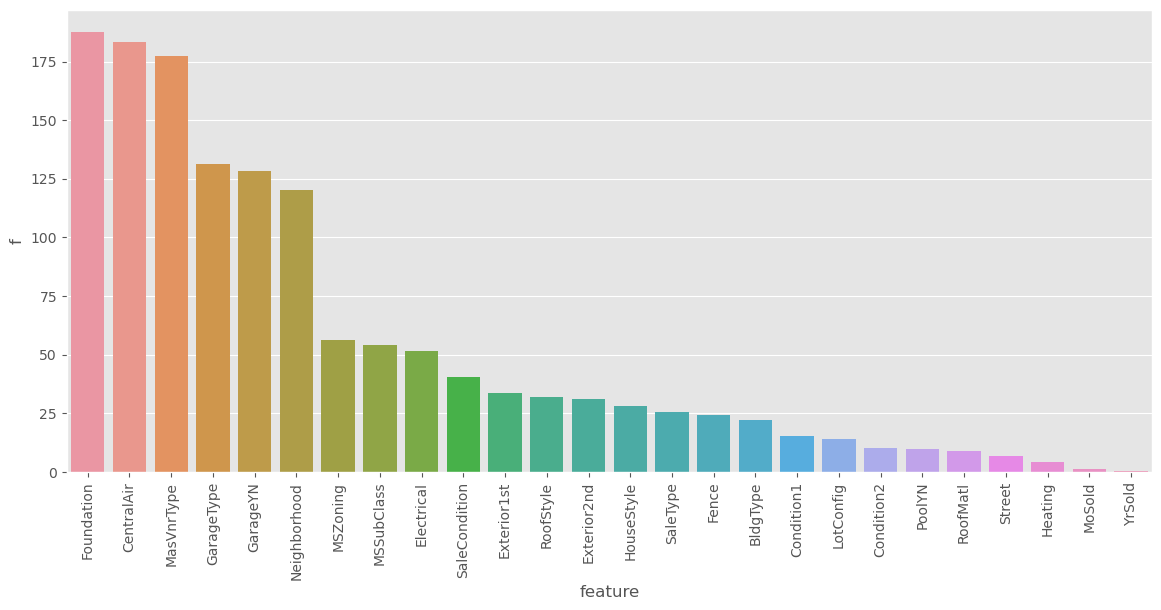

In [218]:
anova = {'feature':[], 'f':[], 'p':[]}
for cat in categorical_columns:
    group_prices = []
    for group in housing[cat].unique():
        group_prices.append(housing[housing[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('f', ascending= False, inplace=True)

plt.figure(figsize=(14,6))
sns.barplot(x='feature', y= 'f', data=anova)
plt.xticks(rotation=90)
for i, row in anova.iterrows():
    ax.text(i, row['f'] / 2, f"{row['p']:.2e}", ha='center', va='center', color='black')

plt.show()
#plt.show()

In [189]:
numerical_columns.remove('SalePrice')

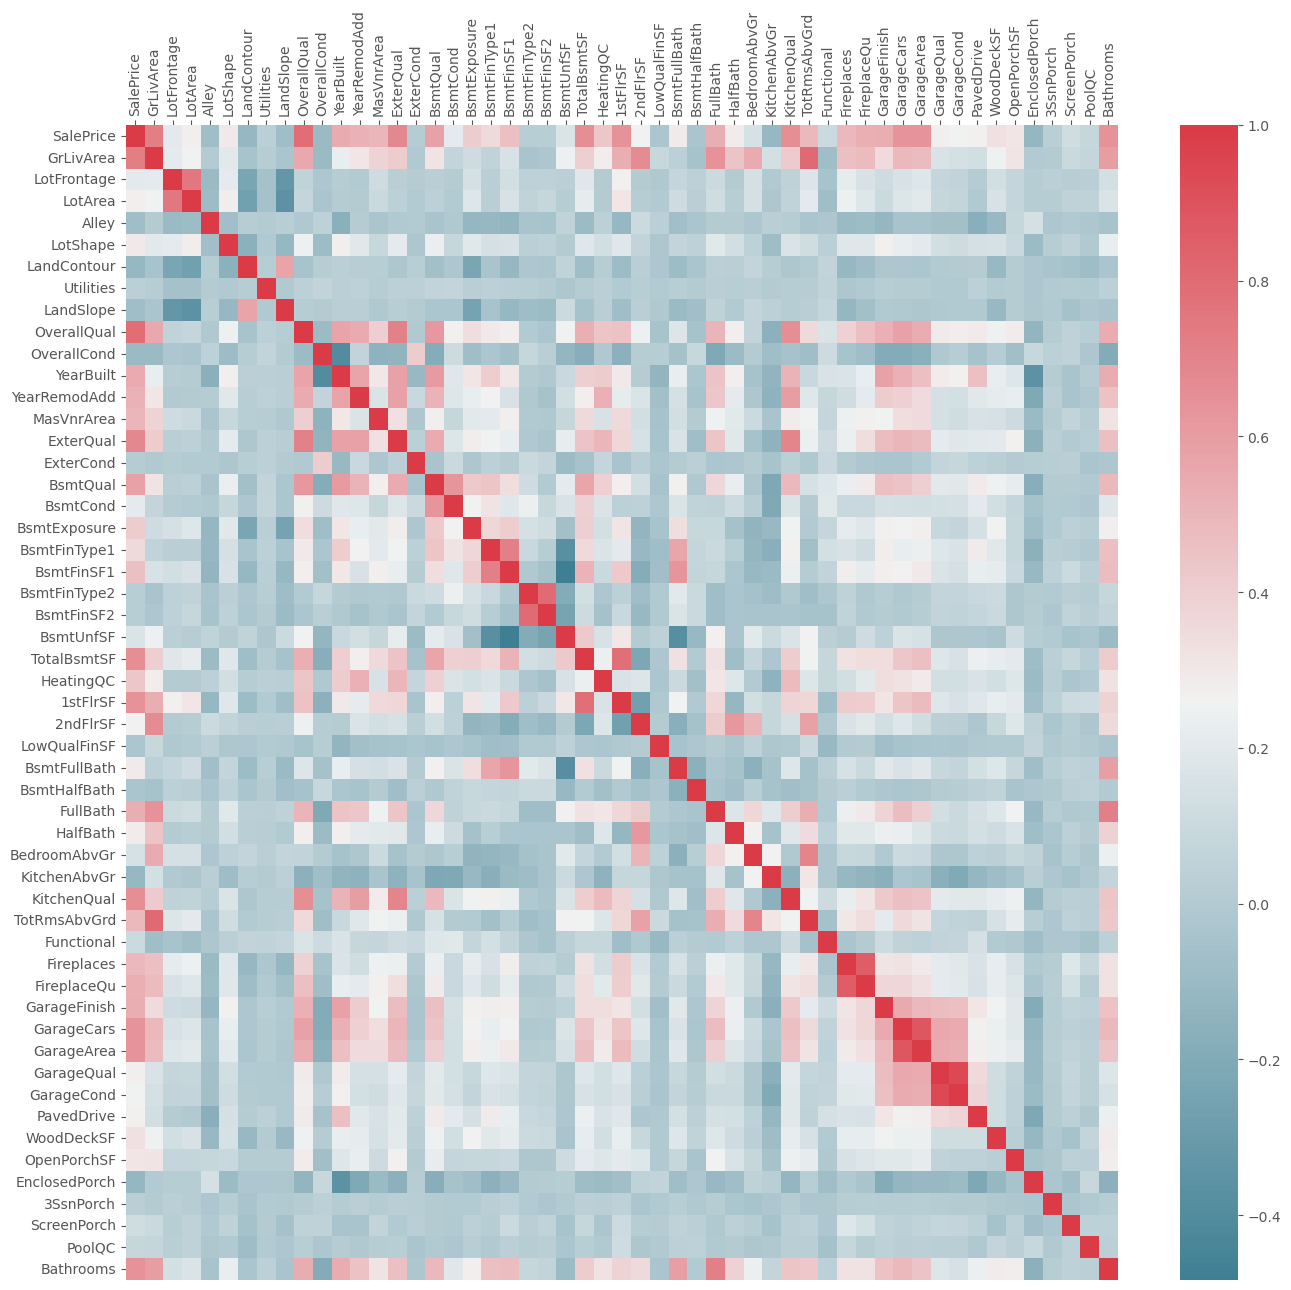

In [190]:
corr = housing[['SalePrice'] + numerical_columns].corr()
corr = corr.drop('PID')
corr = corr.drop(columns=['PID'])
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [191]:
corr = corr.sort_values('SalePrice', ascending=False)
fig = px.bar(corr, 
             x='SalePrice', 
             labels={'x': 'Index', 'SalePrice': 'Sale Price'}, 
             title='Sale Price by Index', 
            height = 1000)

# Show the plot
fig.show()

In [207]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
# reset index so there is only one number associated with each house
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

#Convert some numerical variables to categorical 
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# for the converted features fill in nulls with 0
converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
housing[converted_features] = housing[converted_features].fillna(0)

# some categorical nulls will be filled in with none
missing_categorical_none = ['MasVnrType', 'GarageType', 'Fence', 'MiscFeature']  
housing[missing_categorical_none] = housing[missing_categorical_none].fillna('NO')

# electrical nulls is filled in with the most common value
housing.Electrical = housing.Electrical.fillna('SBrkr')

# most null numericals are filled in with 0
missing_numerical = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                'GarageCars', 'GarageArea']
housing[missing_numerical] = housing[missing_numerical].fillna(0)

# missing lot frontage is filled in with the mean ratio of lot frontage to lot area 
proportion = (housing.LotFrontage/housing.LotArea).mean()
housing.LotFrontage.fillna((housing.LotArea * proportion), inplace=True)

# Pool area is changed to yes/no pool 
f = lambda x: 'yes' if x>0 else 'no'
housing.PoolArea = housing.PoolArea.map(f)
housing = housing.rename(columns={"PoolArea": "PoolYN"})

# Garage year is changed to yes/no garage
housing.GarageYrBlt = housing.GarageYrBlt.fillna(0)
housing = housing.rename(columns={"GarageYrBlt": "GarageYN"})
housing.GarageYN = housing.GarageYN.map(f)

# create a variable for how many bathrooms are in the home 
housing['Bathrooms'] = housing.BsmtFullBath + (.5 *housing.BsmtHalfBath) + housing.FullBath + (.5 *housing.HalfBath)

# drop MiscFeature it has very little information 
housing = housing.drop(['MiscFeature', 'MiscVal'], axis =1).copy()

#drop the one major outlier (Living area 4676 and sale price of 184750)
# I chose to leave the other large house in due to it following the general trend
housing.drop(309, inplace=True)


### Remove certain outlier groups before scaling features

In [4]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

df_unscaled = housing.copy()
df_unscaled.to_csv('df_unscaled.csv')

df_normal_unscaled = df_unscaled.copy()
index_all_normal = df_unscaled[df_unscaled['SaleCondition'] != 'Normal'].index
df_normal_unscaled.drop(index_all_normal, inplace = True)
df_normal_unscaled.to_csv('df_normal_unscaled.csv')

quality = list((np.array(range(1,11)))**2)
indexes = []

for qual in quality:
    outliers = find_outliers_IQR(df_normal_quality_unscaled.loc[df_normal_quality_unscaled.OverallQual == qual].SalePrice)
    indexes.extend(list(outliers.index))
    
df_normal_quality_unscaled.drop(indexes, inplace=True)
df_normal_quality_unscaled.to_csv('df_normal_quality_unscaled.csv')

NameError: name 'df_normal_quality_unscaled' is not defined

### Scaling the highly correlated quality scores improves linear regression

In [5]:
# the relationships among SalesPrice and OverallQual, KitchenQual, and ExterQual are exponential
housing.OverallQual = (housing.OverallQual) ** 2
housing.KitchenQual = (housing.KitchenQual)**3
housing.ExterQual = (housing.ExterQual)**3

# call it df
df = housing.copy()

### Outliers

In [6]:
# remove all outliers 
df_all = df.copy()
outliers = find_outliers_IQR(df_all.SalePrice)
indexes = list(outliers.index)
df_all.drop(indexes, inplace=True)
df_all.to_csv('df_all.csv')


# remove all non-normal sales 
df_all_normal = df.copy()
index_all_normal = df_all_normal[df_all_normal['SaleCondition'] != 'Normal'].index
df_all_normal.drop(index_all_normal, inplace = True)
df_all_normal.to_csv('df_all_normal.csv')


# remove Family, AdjLand, and Alloca sales 
df_faa = df.copy()
index_faa = df_faa[(df_faa['SaleCondition'] == 'Family') | 
                               (df_faa['SaleCondition'] == 'AdjLand') |
                               (df_faa['SaleCondition'] == 'Alloca')].index
df_faa.drop(index_faa, inplace = True)
df_faa.SaleCondition.value_counts()
df_faa.to_csv('df_faa.csv')


# remove all non-normal sales and outliers within each quality group 
df_normal_quality = df_all_normal.copy()

quality = list((np.array(range(1,11)))**2)
indexes = []

for qual in quality:
    outliers = find_outliers_IQR(df_normal_quality.loc[df_normal_quality.OverallQual == qual].SalePrice)
    indexes.extend(list(outliers.index))
    
df_normal_quality.drop(indexes, inplace=True)
df_normal_quality.to_csv('df_normal_quality.csv')


# remove all outliers with quality group 
df_quality = df.copy()

quality = list((np.array(range(1,11)))**2)
indexes = []

for qual in quality:
    outliers = find_outliers_IQR(df_quality.loc[df_quality.OverallQual == qual].SalePrice)
    indexes.extend(list(outliers.index))
    
df_quality.drop(indexes, inplace=True)
df_quality.to_csv('df_quality.csv')

# remove all outliers within quality groups then faa groups
df_some_quality = df_quality.copy()

index_ = df_some_quality[(df_some_quality['SaleCondition'] == 'Family') | 
                               (df_some_quality['SaleCondition'] == 'AdjLand') |
                               (df_some_quality['SaleCondition'] == 'Alloca')].index
df_some_quality.drop(index_, inplace = True)
df_some_quality.SaleCondition.value_counts()
df_some_quality.to_csv('df_some_quality.csv')

### wait on these 

In [74]:
# # remove all points that are outliers in sales price and living area grouped by quality
# df_
# quality = list((np.array(range(1,11)))**2)
# indexes = []

# for qual in quality:
#     a= find_outliers_IQR(df_quality.loc[df_quality.OverallQual == qual].SalePrice)
#     b = find_outliers_IQR(df_quality.loc[df_quality.OverallQual == qual].GrLivArea)
#     a = list(a.index)
#     b = list(b.index)
#     c = set(a) & set(b)
#     indexes.extend(c)
    
# indexes

[1435, 533, 2471]

In [ ]:
# df_
# quality = list((np.array(range(1,11)))**2)
# indexes = []

# for qual in quality:
#     a= find_outliers_IQR(df_quality.loc[df_quality.OverallQual == qual].SalePrice)
#     b = find_outliers_IQR(df_quality.loc[df_quality.OverallQual == qual].GrLivArea)
#     a = list(a.index)
#     b = list(b.index)
#     c = set(a) & set(b)
#     indexes.extend(c)
    
# indexes

In [81]:
# remove all non normal sales then remove any outlier in sales price 

[]
[]
set()


In [23]:
fig = px.scatter(
    x=df_normal_quality.Neighborhood, 
    y= df_normal_quality.SalePrice, 
    #color = df_normal_quality.SalePrice,
    color = np.sqrt(df_normal_quality.OverallQual),
    labels={'x': 'Neighborhood', 'y': 'Living Area in Square Feet'},
    title='Neighborhood vs Living Area'
)

# Show the plot
fig.show()